In [62]:
from torchvision import transforms
import torchvision.transforms.functional as F
import torch
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2

image_file = "1.jpg"

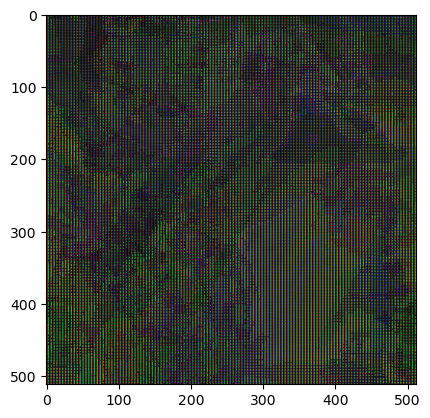

In [63]:
raw_image = Image.open("data/input/images/" + image_file)
tfms = transforms.Compose([
	transforms.Resize(512, interpolation=transforms.InterpolationMode.BILINEAR),
	transforms.CenterCrop(512),
	transforms.ToTensor(),
])
image = tfms(raw_image.convert("RGB"))
img = image.numpy().transpose(1, 2, 0)
plt.imshow(Image.fromarray(img*255, mode="RGB"))
plt.show()

[[[ 75.37945   77.1222    84.73353 ]
  [ 75.37945   77.1222    84.73353 ]
  [140.45631  136.69337  145.6432  ]
  ...
  [190.82405  175.60666  184.00952 ]
  [190.82405  175.60666  184.00952 ]
  [140.45631  136.69337  145.6432  ]]

 [[ 75.37945   77.1222    84.73353 ]
  [140.45631  136.69337  145.6432  ]
  [165.68338  122.93218  100.115166]
  ...
  [ 75.37945   77.1222    84.73353 ]
  [ 75.37945   77.1222    84.73353 ]
  [ 75.37945   77.1222    84.73353 ]]

 [[165.68338  122.93218  100.115166]
  [140.45631  136.69337  145.6432  ]
  [165.68338  122.93218  100.115166]
  ...
  [ 75.37945   77.1222    84.73353 ]
  [ 75.37945   77.1222    84.73353 ]
  [ 75.37945   77.1222    84.73353 ]]

 ...

 [[165.68338  122.93218  100.115166]
  [196.12254  195.17046  112.229744]
  [165.68338  122.93218  100.115166]
  ...
  [128.72174   88.80959   70.9582  ]
  [165.68338  122.93218  100.115166]
  [165.68338  122.93218  100.115166]]

 [[165.68338  122.93218  100.115166]
  [196.12254  195.17046  112.229744]


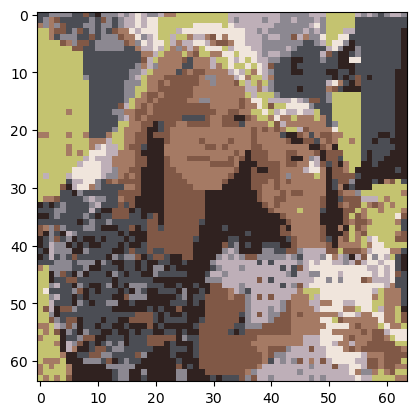

In [78]:
def palette_preprocessing(img: np.array, h: int, w: int, image_file: str):
    # resize image to get a 1/8 downsample
    img_r = cv2.resize(img*255, (h, w), interpolation=cv2.INTER_LINEAR)
    Z = img_r.reshape((-1, 3))
    Z = np.float32(Z)
    # define criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # number of colors in the palette
    K = 8
    # apply kmeans
    _, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    label_flat = label.flatten()
    # compose final output using color palette stored in center at the indexes stored in label_flat
    res = center[label_flat]
    # rehape to the resized image dimensions and bring values in [0, 1) range
    res = res.reshape(img_r.shape)
    cv2.imwrite("data/input/palette/" + image_file.split(".")[0] + ".png", res)
    print(res)
    plt.imshow(Image.fromarray(np.uint8(res)))
    plt.show()

palette_preprocessing(img, 64, 64, image_file)

tensor([[[0.2941, 0.2941, 0.5490,  ..., 0.7490, 0.7490, 0.5490],
         [0.2941, 0.5490, 0.6510,  ..., 0.2941, 0.2941, 0.2941],
         [0.6510, 0.5490, 0.6510,  ..., 0.2941, 0.2941, 0.2941],
         ...,
         [0.6510, 0.7686, 0.6510,  ..., 0.5059, 0.6510, 0.6510],
         [0.6510, 0.7686, 0.7686,  ..., 0.5059, 0.7686, 0.7686],
         [0.7686, 0.6510, 0.7686,  ..., 0.7686, 0.6510, 0.6510]],

        [[0.3020, 0.3020, 0.5373,  ..., 0.6902, 0.6902, 0.5373],
         [0.3020, 0.5373, 0.4824,  ..., 0.3020, 0.3020, 0.3020],
         [0.4824, 0.5373, 0.4824,  ..., 0.3020, 0.3020, 0.3020],
         ...,
         [0.4824, 0.7647, 0.4824,  ..., 0.3490, 0.4824, 0.4824],
         [0.4824, 0.7647, 0.7647,  ..., 0.3490, 0.7647, 0.7647],
         [0.7647, 0.4824, 0.7647,  ..., 0.7647, 0.4824, 0.4824]],

        [[0.3333, 0.3333, 0.5725,  ..., 0.7216, 0.7216, 0.5725],
         [0.3333, 0.5725, 0.3922,  ..., 0.3333, 0.3333, 0.3333],
         [0.3922, 0.5725, 0.3922,  ..., 0.3333, 0.3333, 0.

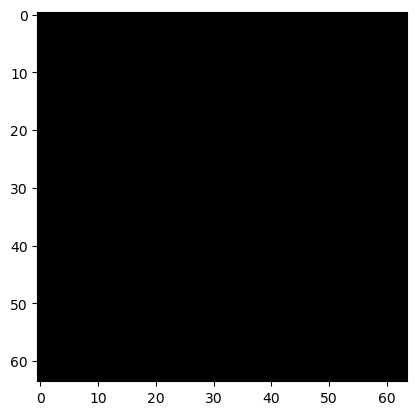

In [82]:
def get_palette_datamap(image_file: str) -> torch.Tensor:
    # read the image's corresponding color palette
    img = cv2.imread("data/input/palette/" + image_file.split(".")[0] + ".png")
    return torch.from_numpy(img/255).permute(2, 0, 1)

image = get_palette_datamap(image_file)
print(image)
plt.imshow(Image.fromarray(np.uint8(image.permute(1, 2, 0).numpy())))
plt.show()